<a href="https://colab.research.google.com/github/ZoryAce/Topicos/blob/main/ENTREGA1/TALLER4/Taller4_PretrainedModelsPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tranfer Learnning to Flower Recognition using PyTorch 🔥
This dataset contains labeled 4242 images of flowers.


### Content
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

## Data
You can download data from: [Flowers Recognition Dataset](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition)

INTEGRANTES:

Luis Alejandro Garzón Ramirez

Zorayda Acevedo Jimenez

Yulieth Danitza Aguillón Ortega

In [ ]:
import numpy as np
import pandas as pd
import os
#path="./"
#os.listdir(path)

In [ ]:
pip install gdown

In [ ]:
import gdown
import zipfile
import os

# ID del archivo extraído del enlace de Google Drive
file_id = "15b0wfUXZZiPd3RAnt_quJZIjW3kP6mAA"
url = f"https://drive.google.com/uc?id={file_id}"

# Descargar el archivo
output = "flowers.zip"
gdown.download(url, output, quiet=False)

# Descomprimir el archivo
path = '/content'
os.makedirs(path, exist_ok=True)

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(path)

print("¡Archivo descargado y descomprimido con éxito!")

Downloading...
From (original): https://drive.google.com/uc?id=15b0wfUXZZiPd3RAnt_quJZIjW3kP6mAA
From (redirected): https://drive.google.com/uc?id=15b0wfUXZZiPd3RAnt_quJZIjW3kP6mAA&confirm=t&uuid=d5714765-0d71-49a6-864a-7fd33814ac63
To: /content/flowers.zip
100%|██████████| 166M/166M [00:02<00:00, 60.2MB/s]


¡Archivo descargado y descomprimido con éxito!


In [ ]:
import os
print(os.listdir('/content'))

['.config', 'flowers', 'flowers.zip', 'sample_data']


In [ ]:
import os
print(os.listdir('/content/flowers'))

['dandelion', 'sunflower', 'tulip', 'daisy', 'rose']


In [ ]:
print(os.listdir('/content/flowers'))

['dandelion', 'sunflower', 'tulip', 'daisy', 'rose']


In [ ]:
classes=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [ ]:
#CONTEO DE IMAGENES EN EL ARCHIVO LA CUAL DIFIERE DE LO INDICADO
#EN EL ENCABEZADO (4317 IMAGENES)
path = '/content/flowers'
img_type = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')
img_qty = sum([len(files) for r, d, files in os.walk(path)
                   if any(file.lower().endswith(img_type) for file in files)])

print(f"Número de imagenes: {img_qty}")

Número de imagenes: 2746


In [ ]:
label_of_file=[]
img_list=[]

for kind in classes:
    kind_path=os.path.join(path,kind)

    for img in os.listdir(kind_path):
        img_list.append(os.path.join(kind_path,img))
        label_of_file.append(kind)

df=pd.DataFrame({'img':img_list,'label':label_of_file})
df.head(3)
df = df.sample(frac=1).reset_index(drop=True)
df.head(2)

,img,label
0,/content/flowers/sunflower/21821266773_7113d34...,sunflower
1,/content/flowers/daisy/8938566373_d129e7af75.jpg,daisy


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['encode_label'] = encoder.fit_transform(df['label'])

In [ ]:
df.head(10)

,img,label,encode_label
0,/content/flowers/sunflower/21821266773_7113d34...,sunflower,3
1,/content/flowers/daisy/8938566373_d129e7af75.jpg,daisy,0
2,/content/flowers/daisy/8619103877_d8c82c5f34_n...,daisy,0
3,/content/flowers/tulip/15976769174_1d50f46ca1_...,tulip,4
4,/content/flowers/dandelion/4556178143_e0d32c0a...,dandelion,1
5,/content/flowers/tulip/5691090657_2f1e9bf49e_n...,tulip,4
6,/content/flowers/sunflower/23356825566_f588587...,sunflower,3
7,/content/flowers/daisy/3611577717_f3a7a8c416_n...,daisy,0
8,/content/flowers/tulip/13531007054_c88deaf302_...,tulip,4
9,/content/flowers/daisy/7790614422_4557928ab9_n...,daisy,0


In [ ]:
!pip install opencv-python
import cv2
import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split
from torchvision import transforms, models

In [ ]:
example_img = cv2.imread(df['img'][2])
example_img.shape

(250, 320, 3)

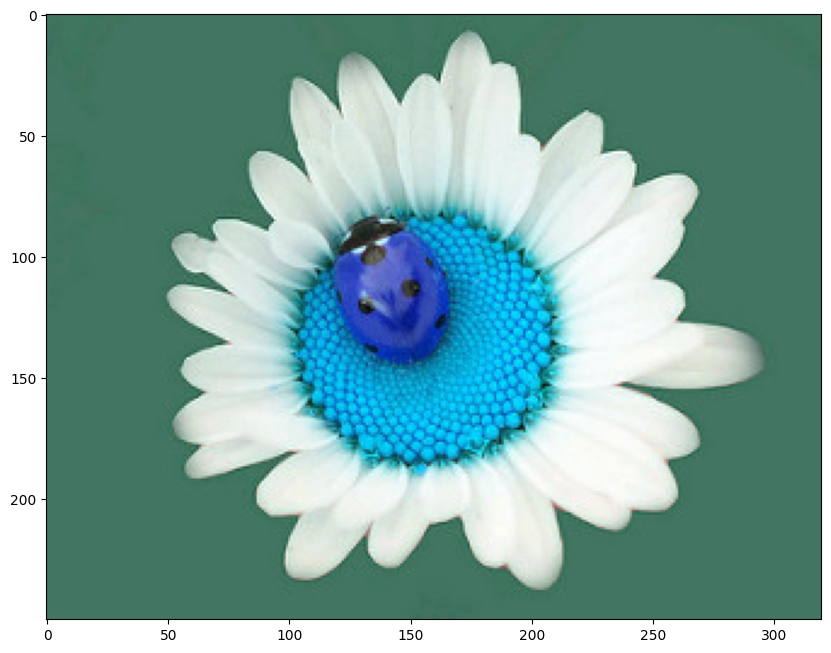

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(example_img)
plt.show()

In [ ]:
import numpy as np
x=[]
for img in df['img']:
    try:
        img = cv2.imread(img)
        img = cv2.resize(img, (150, 150))
        img = img / 255.0  # normalize
        x.append(img)      # img

    except:
        print(f"Error loading image: {img}")

## Modeling

In [ ]:

# Convertir a tensores x y y
X_tensor = torch.tensor(np.array(x).transpose(0, 3, 1, 2), dtype=torch.float32)  # Formato (N, C, H, W)
y_tensor = torch.tensor(df['encode_label'].values, dtype=torch.long)              # Etiquetas como tensor

In [ ]:
df_tensor = TensorDataset(X_tensor, y_tensor)#crear dataset de tensores

In [ ]:
#Creacion dataset entrenamiento y pruebas
train_size = int(0.8 * len(df_tensor))
test_size = len(df_tensor) - train_size
train_dataset, test_dataset = random_split(df_tensor, [train_size, test_size])

In [ ]:
# Creación de dataloader de entrenamiento y pruebas
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# make model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 5)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 50.9MB/s]


In [ ]:
# train Model
criterion = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# train model
def train_model(model, criterion, optimizer, num_epochs=25):
  model.train()

  for epoch in range(num_epochs):
    running_loss = 0.0
    # Iterate directly over the train_loader
    for inputs, labels in train_loader:
      optimizer.zero_grad()
      #inputs = inputs.double()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item() * inputs.size(0)
      avg_loss = running_loss / len(train_loader.dataset)
      print(f"Época {epoch+1}/{num_epochs} - Pérdida: {avg_loss:.4f}")
    print("Entrenamiento completado ✅")

In [ ]:
def test_model(model, test_loader, criterion):
    model.eval()  # Modo evaluación
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    test_loss = 0.0
    correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:  # Iteración correcta
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            test_loss += criterion(outputs, labels).item() * inputs.size(0)

            pred = outputs.argmax(dim=1, keepdim=True)  # Predicción más probable
            correct += pred.eq(labels.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print(f'Test set: Average loss: {test_loss:.4f}, '
          f'Accuracy: {correct}/{len(test_loader.dataset)} ({test_accuracy:.0f}%)')


In [ ]:
torch.cuda.is_available()

True

In [ ]:
# training
train_model(model, criterion, optimizer, num_epochs=20)

Época 1/20 - Pérdida: 0.0530
Época 1/20 - Pérdida: 0.0802
Época 1/20 - Pérdida: 0.1049
Época 1/20 - Pérdida: 0.1322
Época 1/20 - Pérdida: 0.1571
Época 1/20 - Pérdida: 0.1845
Época 1/20 - Pérdida: 0.2116
Época 1/20 - Pérdida: 0.2271
Época 1/20 - Pérdida: 0.2512
Época 1/20 - Pérdida: 0.2678
Época 1/20 - Pérdida: 0.2975
Época 1/20 - Pérdida: 0.3219
Época 1/20 - Pérdida: 0.3420
Época 1/20 - Pérdida: 0.3614
Época 1/20 - Pérdida: 0.3774
Época 1/20 - Pérdida: 0.3967
Época 1/20 - Pérdida: 0.4168
Época 1/20 - Pérdida: 0.4367
Época 1/20 - Pérdida: 0.4667
Época 1/20 - Pérdida: 0.4858
Época 1/20 - Pérdida: 0.5055
Época 1/20 - Pérdida: 0.5244
Época 1/20 - Pérdida: 0.5455
Época 1/20 - Pérdida: 0.5615
Época 1/20 - Pérdida: 0.5720
Época 1/20 - Pérdida: 0.5887
Época 1/20 - Pérdida: 0.6017
Época 1/20 - Pérdida: 0.6210
Época 1/20 - Pérdida: 0.6333
Época 1/20 - Pérdida: 0.6457
Época 1/20 - Pérdida: 0.6589
Época 1/20 - Pérdida: 0.6753
Época 1/20 - Pérdida: 0.6983
Época 1/20 - Pérdida: 0.7254
Época 1/20 - P

In [ ]:
model.eval()

In [ ]:
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():  # Desactiva el cálculo de gradientes
    for images, labels in test_loader:
        #images, labels = images.to(device), labels.to(device)  # GPU si está disponible
        outputs = model(images)

        # Calcular la pérdida
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        # Calcular precisión
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Mostrar resultados
print(f'Pérdida en test: {test_loss / len(test_loader):.4f}')
print(f'Precisión en test: {100 * correct / total:.2f}%')
